In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random

In [2]:
os.listdir("../")

['.git',
 '.ipynb_checkpoints',
 '1-KNN',
 '10-Decision Tree',
 '11-Markov Chains',
 '12-Artificial Neural Network',
 '2-Linear_Regression',
 '3-Logistic Regression',
 '4-Multilinear Regression',
 '5-NLP Basics',
 '6-Naive Bayes',
 '7-KMean',
 '8-SVM',
 '9-Multi Class Classification',
 'Challenges']

In [3]:
categories=os.listdir("../9-Multi Class Classification/Images")
categories

['Cats', 'Dogs', 'Horses']

In [5]:
dic={}
count=-1
X=[]
Y=[]
for c in categories:
    if c not in dic:
        count+=1
        dic[c]=count
    
    all_images=os.listdir("../9-Multi Class Classification/Images/"+c)
    for i in all_images:
        path="../9-Multi Class Classification/Images/"+c+"/"+i
        
        img=plt.imread(path)
        img=cv2.resize(img,(50,50))
        X.append(img)
        Y.append(dic[c])
    

In [7]:
X_=np.array(X)

In [8]:
X_.shape[0]

606

In [9]:
X_=X_.reshape((X_.shape[0],-1))

In [10]:
Y=np.array(Y)

In [11]:
Y.shape

(606,)

In [12]:
data=np.hstack((X_,Y.reshape(-1,1)))

In [13]:
np.random.shuffle(data)

In [14]:
X=data[:,:-1]
Y=data[:,-1]

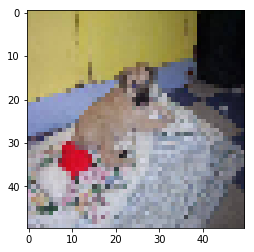

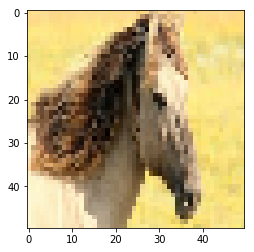

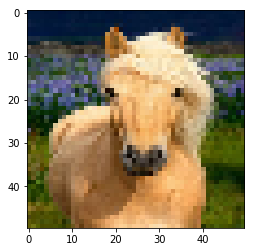

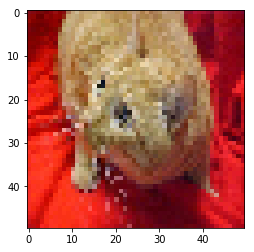

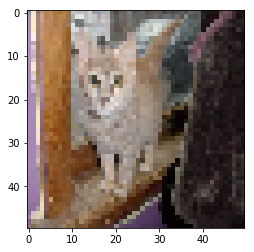

In [15]:
for i in range(5):
    plt.imshow(X[i].reshape((50,50,3)))
    plt.show()

In [16]:
X=X/255.

In [17]:
X.shape,Y.shape

((606, 7500), (606,))

In [18]:
from keras.models    import Sequential 
from keras.layers    import Dense
from keras.utils     import to_categorical
from keras.models    import load_model
from keras.callbacks import ModelCheckpoint,EarlyStopping

Using TensorFlow backend.


In [19]:
model=Sequential()
model.add(Dense(units=1000,activation="relu",input_shape=(X.shape[1],)))
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=64,  activation="relu"))
model.add(Dense(units=3,   activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              7501000   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               256256    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 7,773,899
Trainable params: 7,773,899
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [21]:
y_oht=to_categorical(Y)

In [22]:
y_oht.shape

(606, 3)

In [23]:
modelcheckpoint=ModelCheckpoint("./best_model.h5",monitor="val_accuracy",verbose=1,save_best_only=True)

In [24]:
early_stop=EarlyStopping(monitor='val_accuracy',min_delta=0.005,patience=10,verbose=1,restore_best_weights=True)

In [25]:
call_back=[modelcheckpoint,early_stop]

In [26]:
hist=model.fit(X,y_oht,batch_size=256,epochs=150,validation_split=.1,callbacks=call_back)

Train on 545 samples, validate on 61 samples
Epoch 1/120
545/545 [==============================] - 1s 2ms/step - loss: 2.6945 - accuracy: 0.3321 - val_loss: 8.9724 - val_accuracy: 0.3443

Epoch 00001: val_accuracy improved from -inf to 0.34426, saving model to ./best_model.h5
Epoch 2/120
545/545 [==============================] - 1s 1ms/step - loss: 6.6546 - accuracy: 0.3321 - val_loss: 2.4451 - val_accuracy: 0.4426

Epoch 00002: val_accuracy improved from 0.34426 to 0.44262, saving model to ./best_model.h5
Epoch 3/120
545/545 [==============================] - 1s 1ms/step - loss: 2.3712 - accuracy: 0.3174 - val_loss: 1.2795 - val_accuracy: 0.3443

Epoch 00003: val_accuracy did not improve from 0.44262
Epoch 4/120
545/545 [==============================] - 1s 1ms/step - loss: 1.3503 - accuracy: 0.3358 - val_loss: 1.1728 - val_accuracy: 0.2787

Epoch 00004: val_accuracy did not improve from 0.44262
Epoch 5/120
545/545 [==============================] - 1s 1ms/step - loss: 1.2129 - accu

In [27]:
X.shape

(606, 7500)

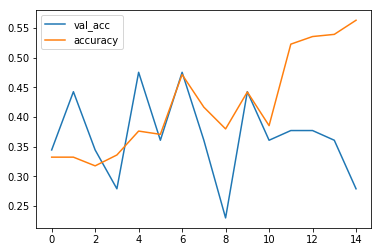

In [28]:
res=hist.history
plt.plot(res['val_accuracy'],label="val_acc")
plt.plot(res['accuracy'],label="accuracy")
plt.legend()
plt.show()

In [29]:
Y_pred=model.predict_classes(X)

In [30]:
(Y_pred==Y).mean()

0.45544554455445546

In [31]:
new_model=load_model("best_model.h5")

In [32]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              7501000   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               256256    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 7,773,899
Trainable params: 7,773,899
Non-trainable params: 0
_________________________________________________________________


In [35]:
y_pred1=new_model.predict_classes(X)

In [36]:
(y_pred1==Y).mean()

0.45544554455445546